In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
import numpy as np

2023-06-22 23:37:43.505051: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-06-22 23:37:43.525491: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-22 23:37:44.091693: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-22 23:37:44.094130: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-22 23:37:54.103740: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

1/1 [==============================] - 1s 1s/step


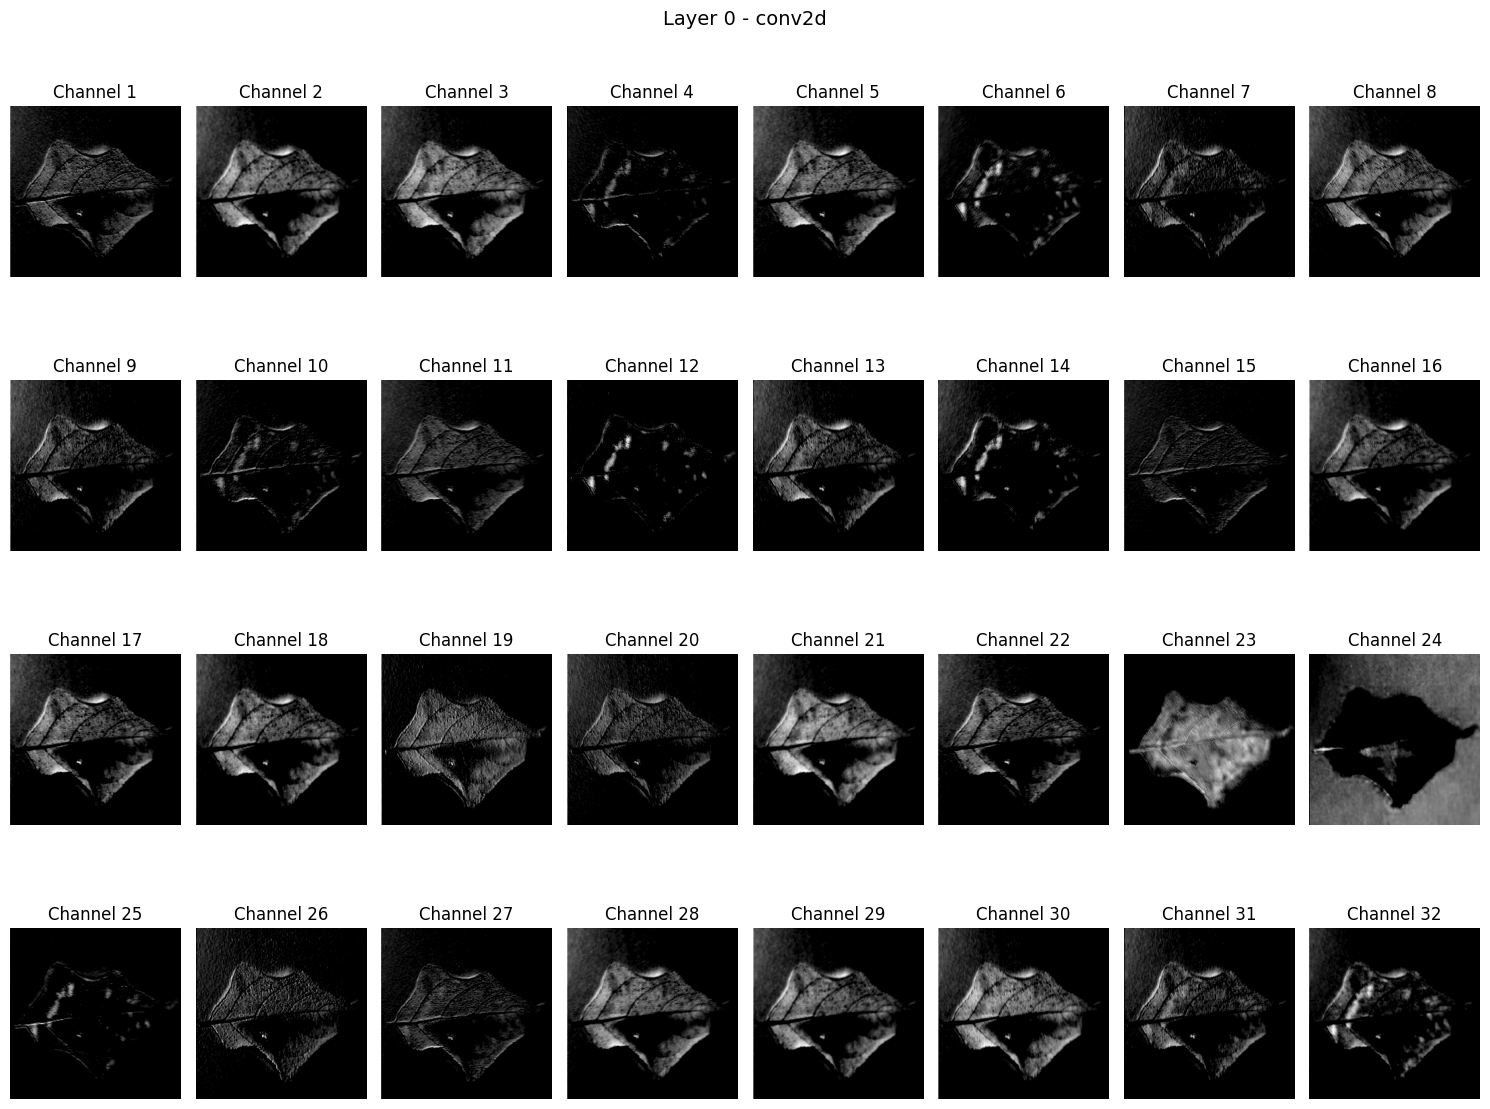

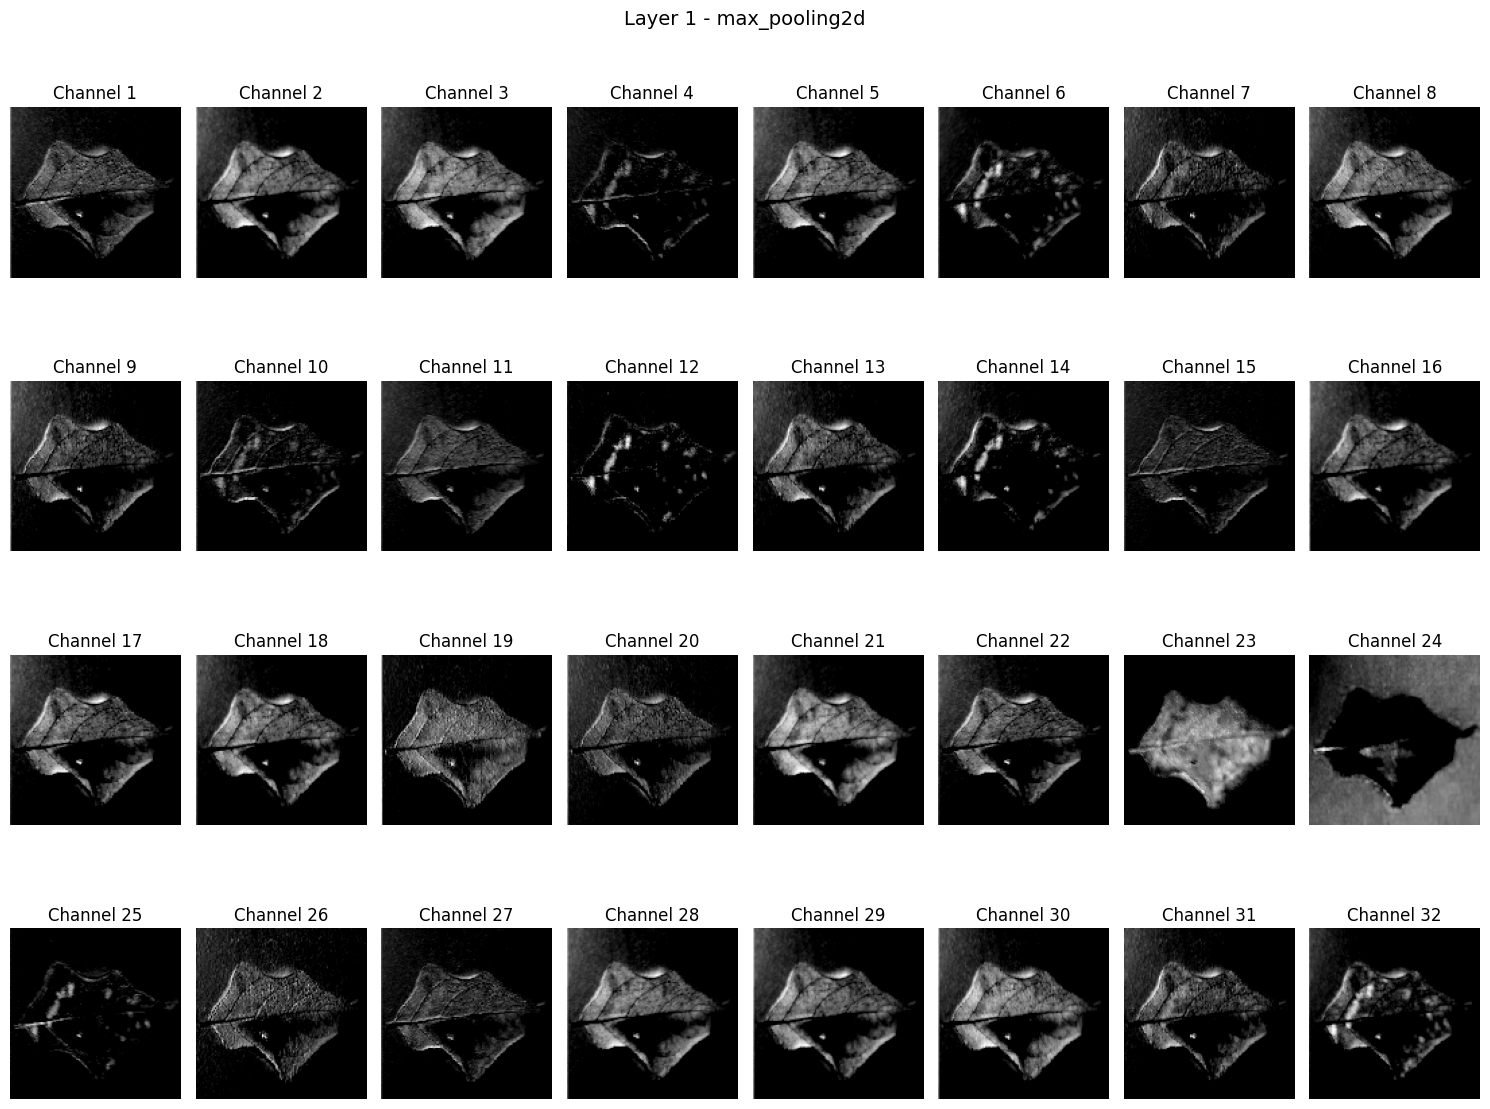

/tmp/ipykernel_6164/2187981347.py:48: RuntimeWarning: invalid value encountered in divide
  normalized_activations = ((channel_activations - np.min(channel_activations)) /


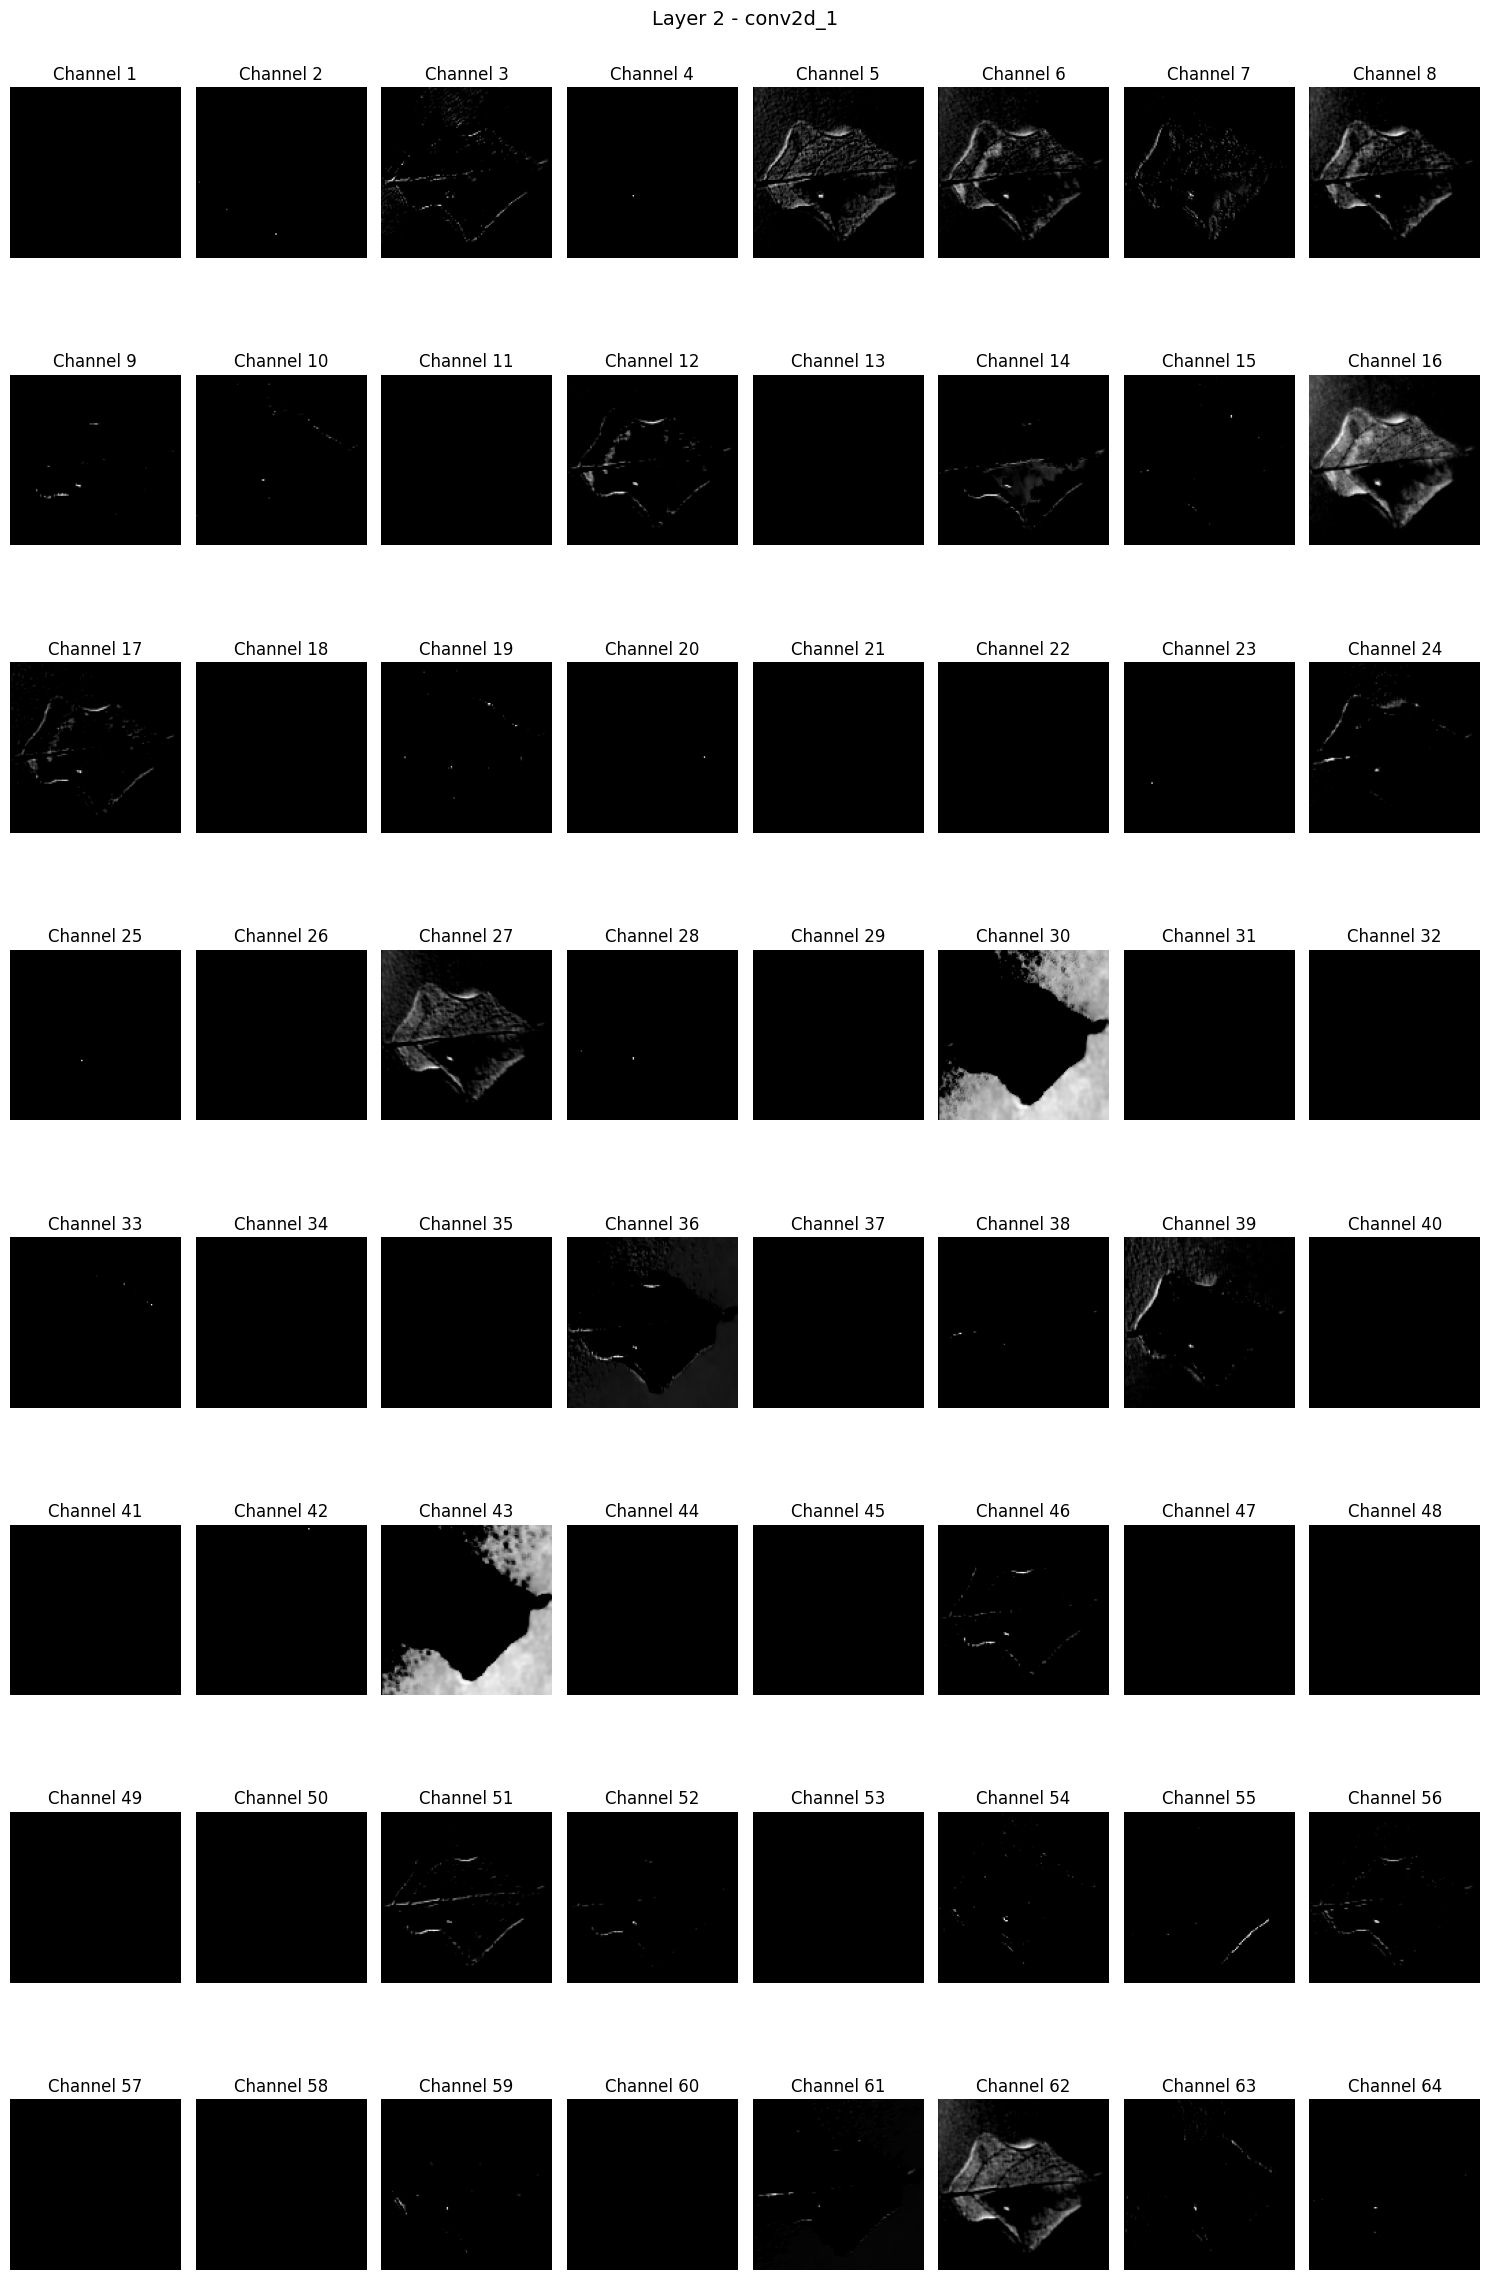

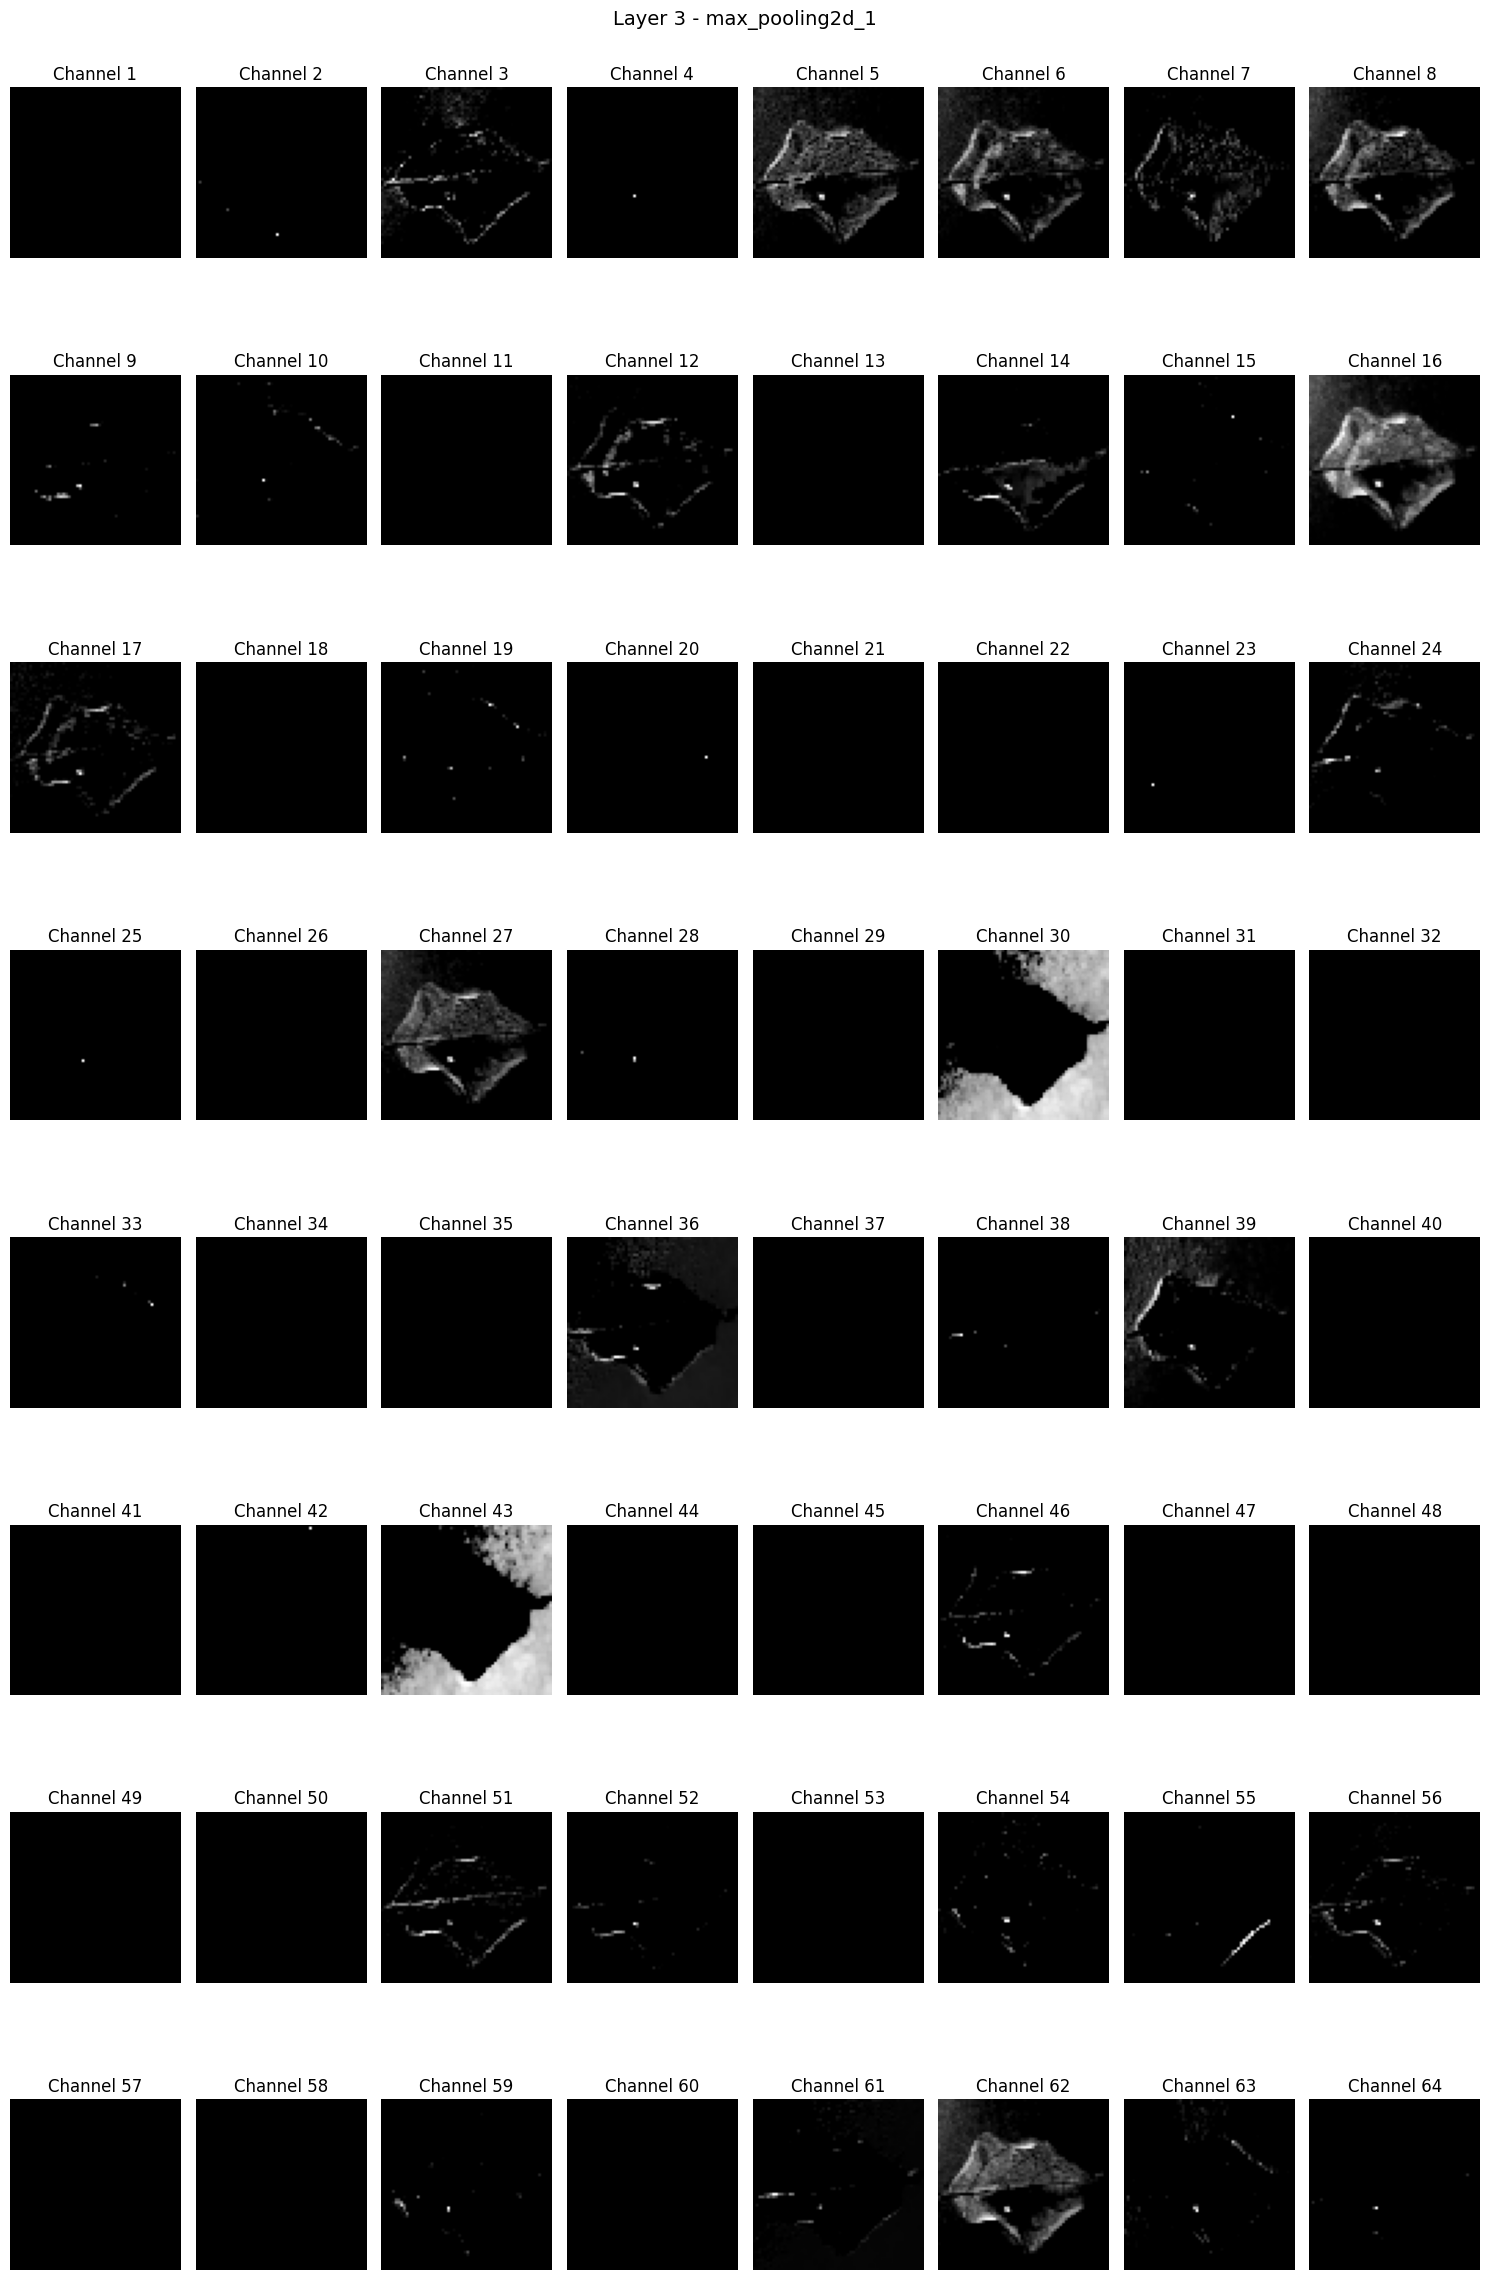

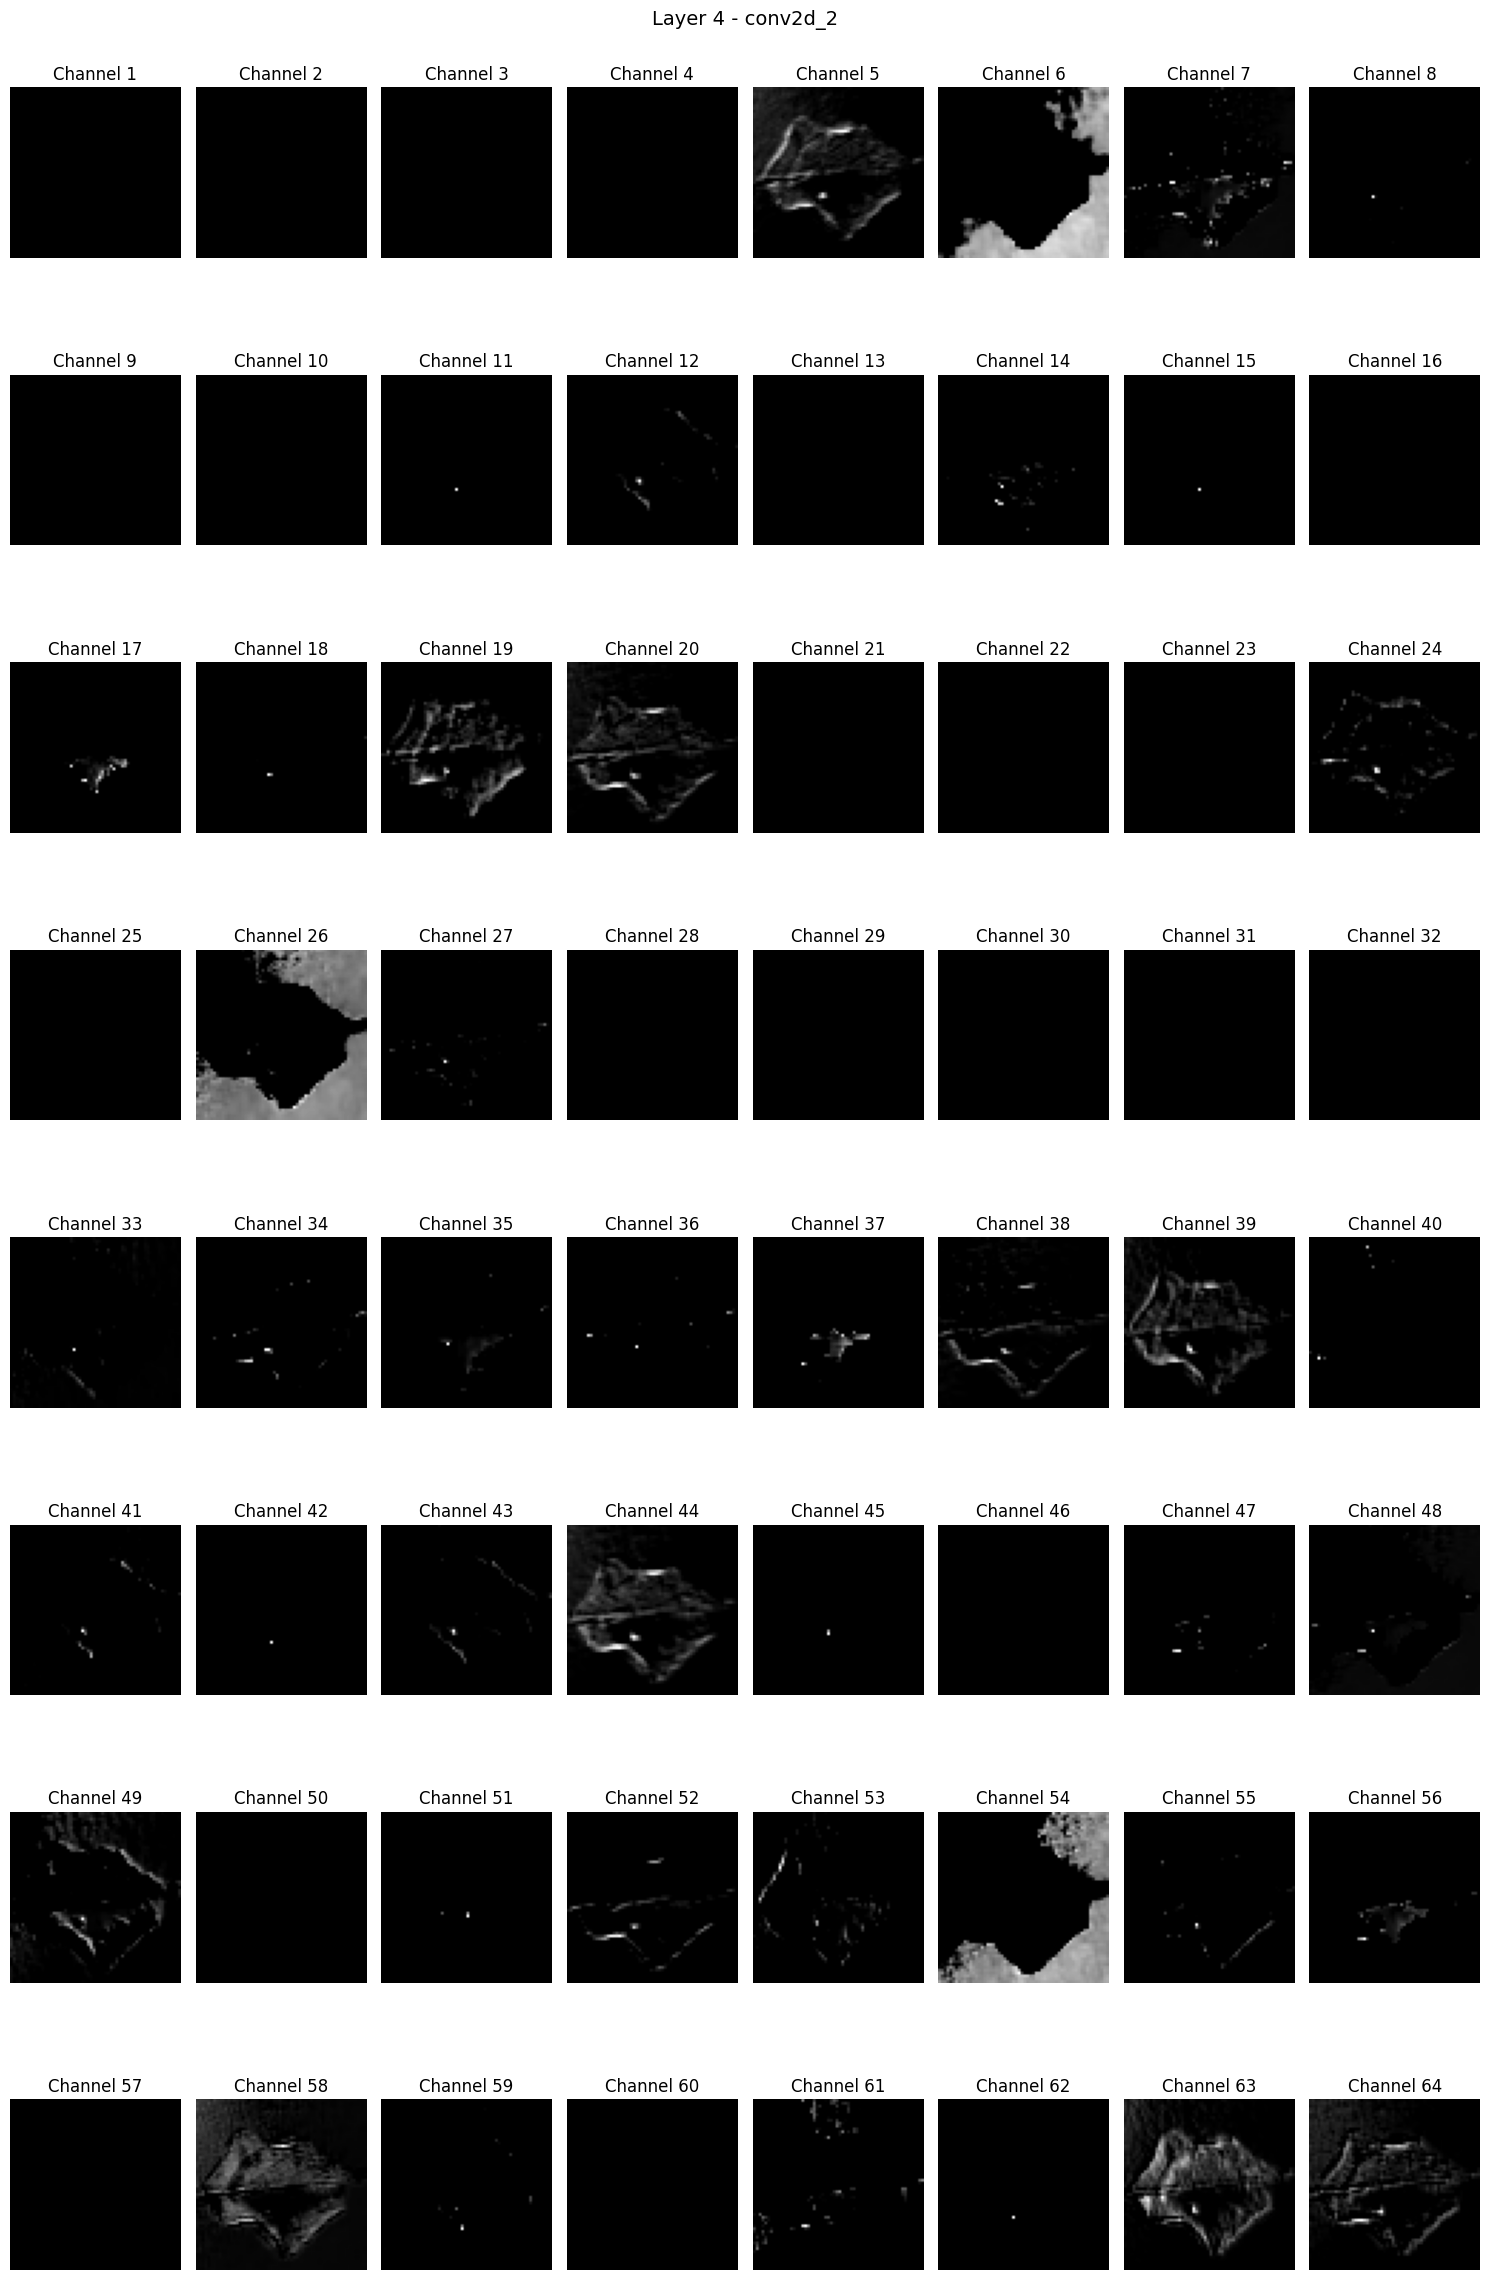

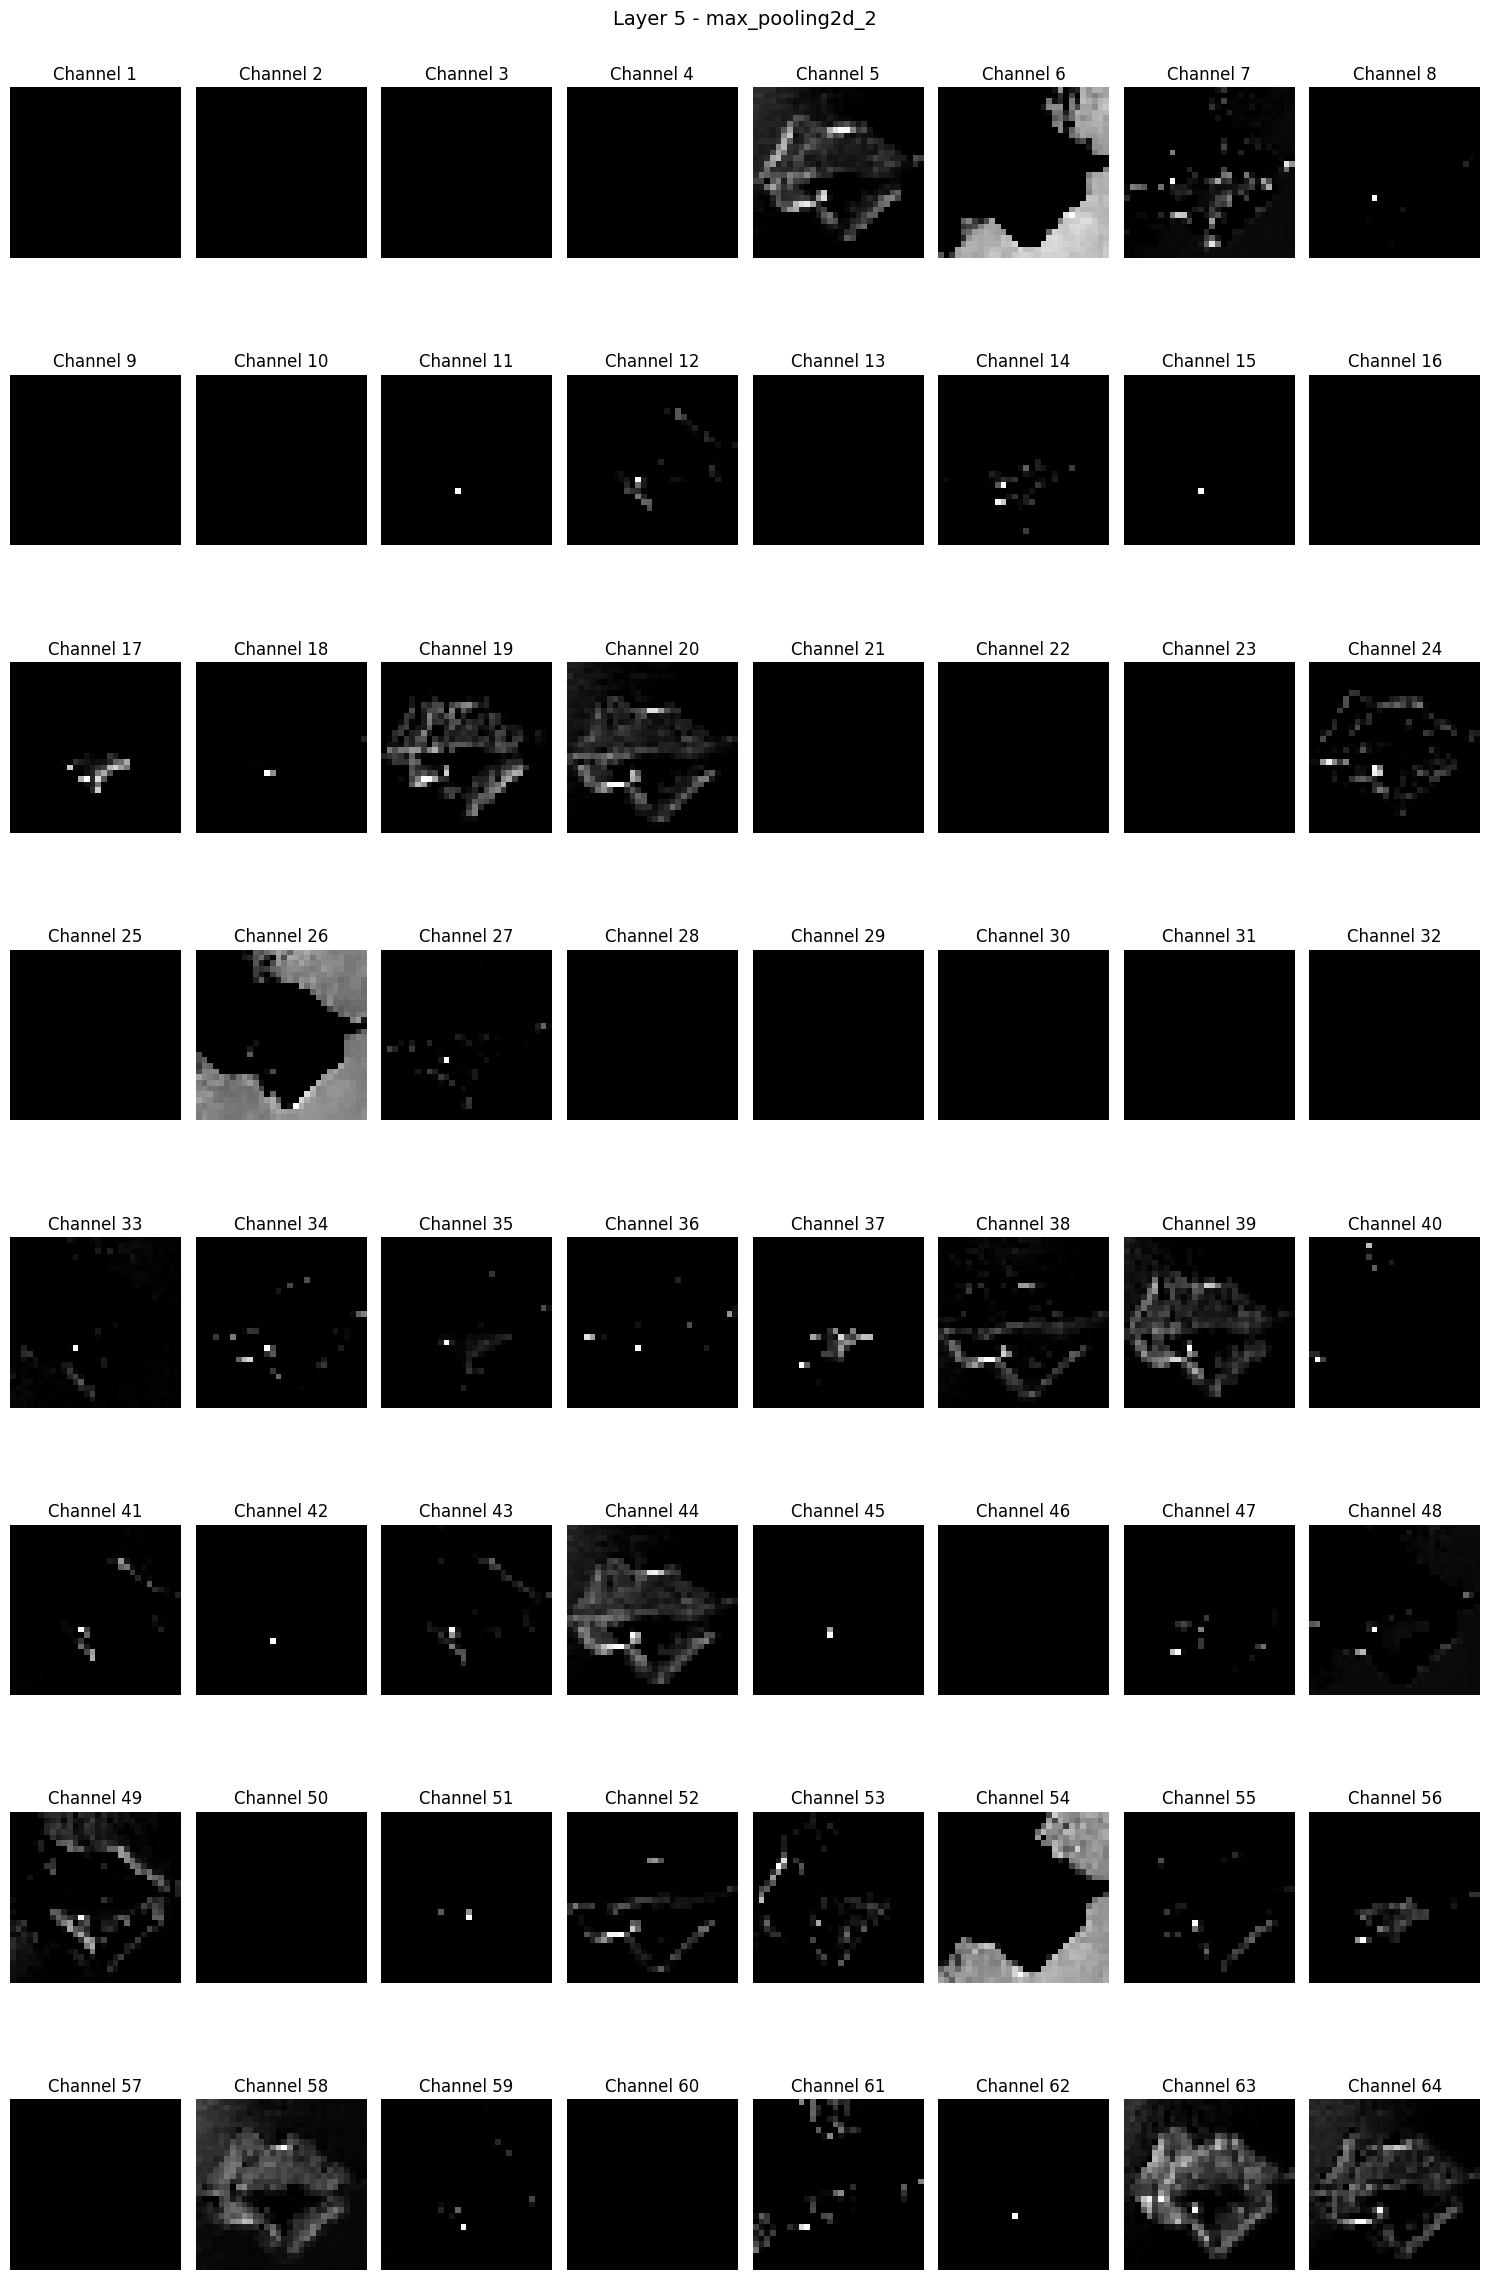

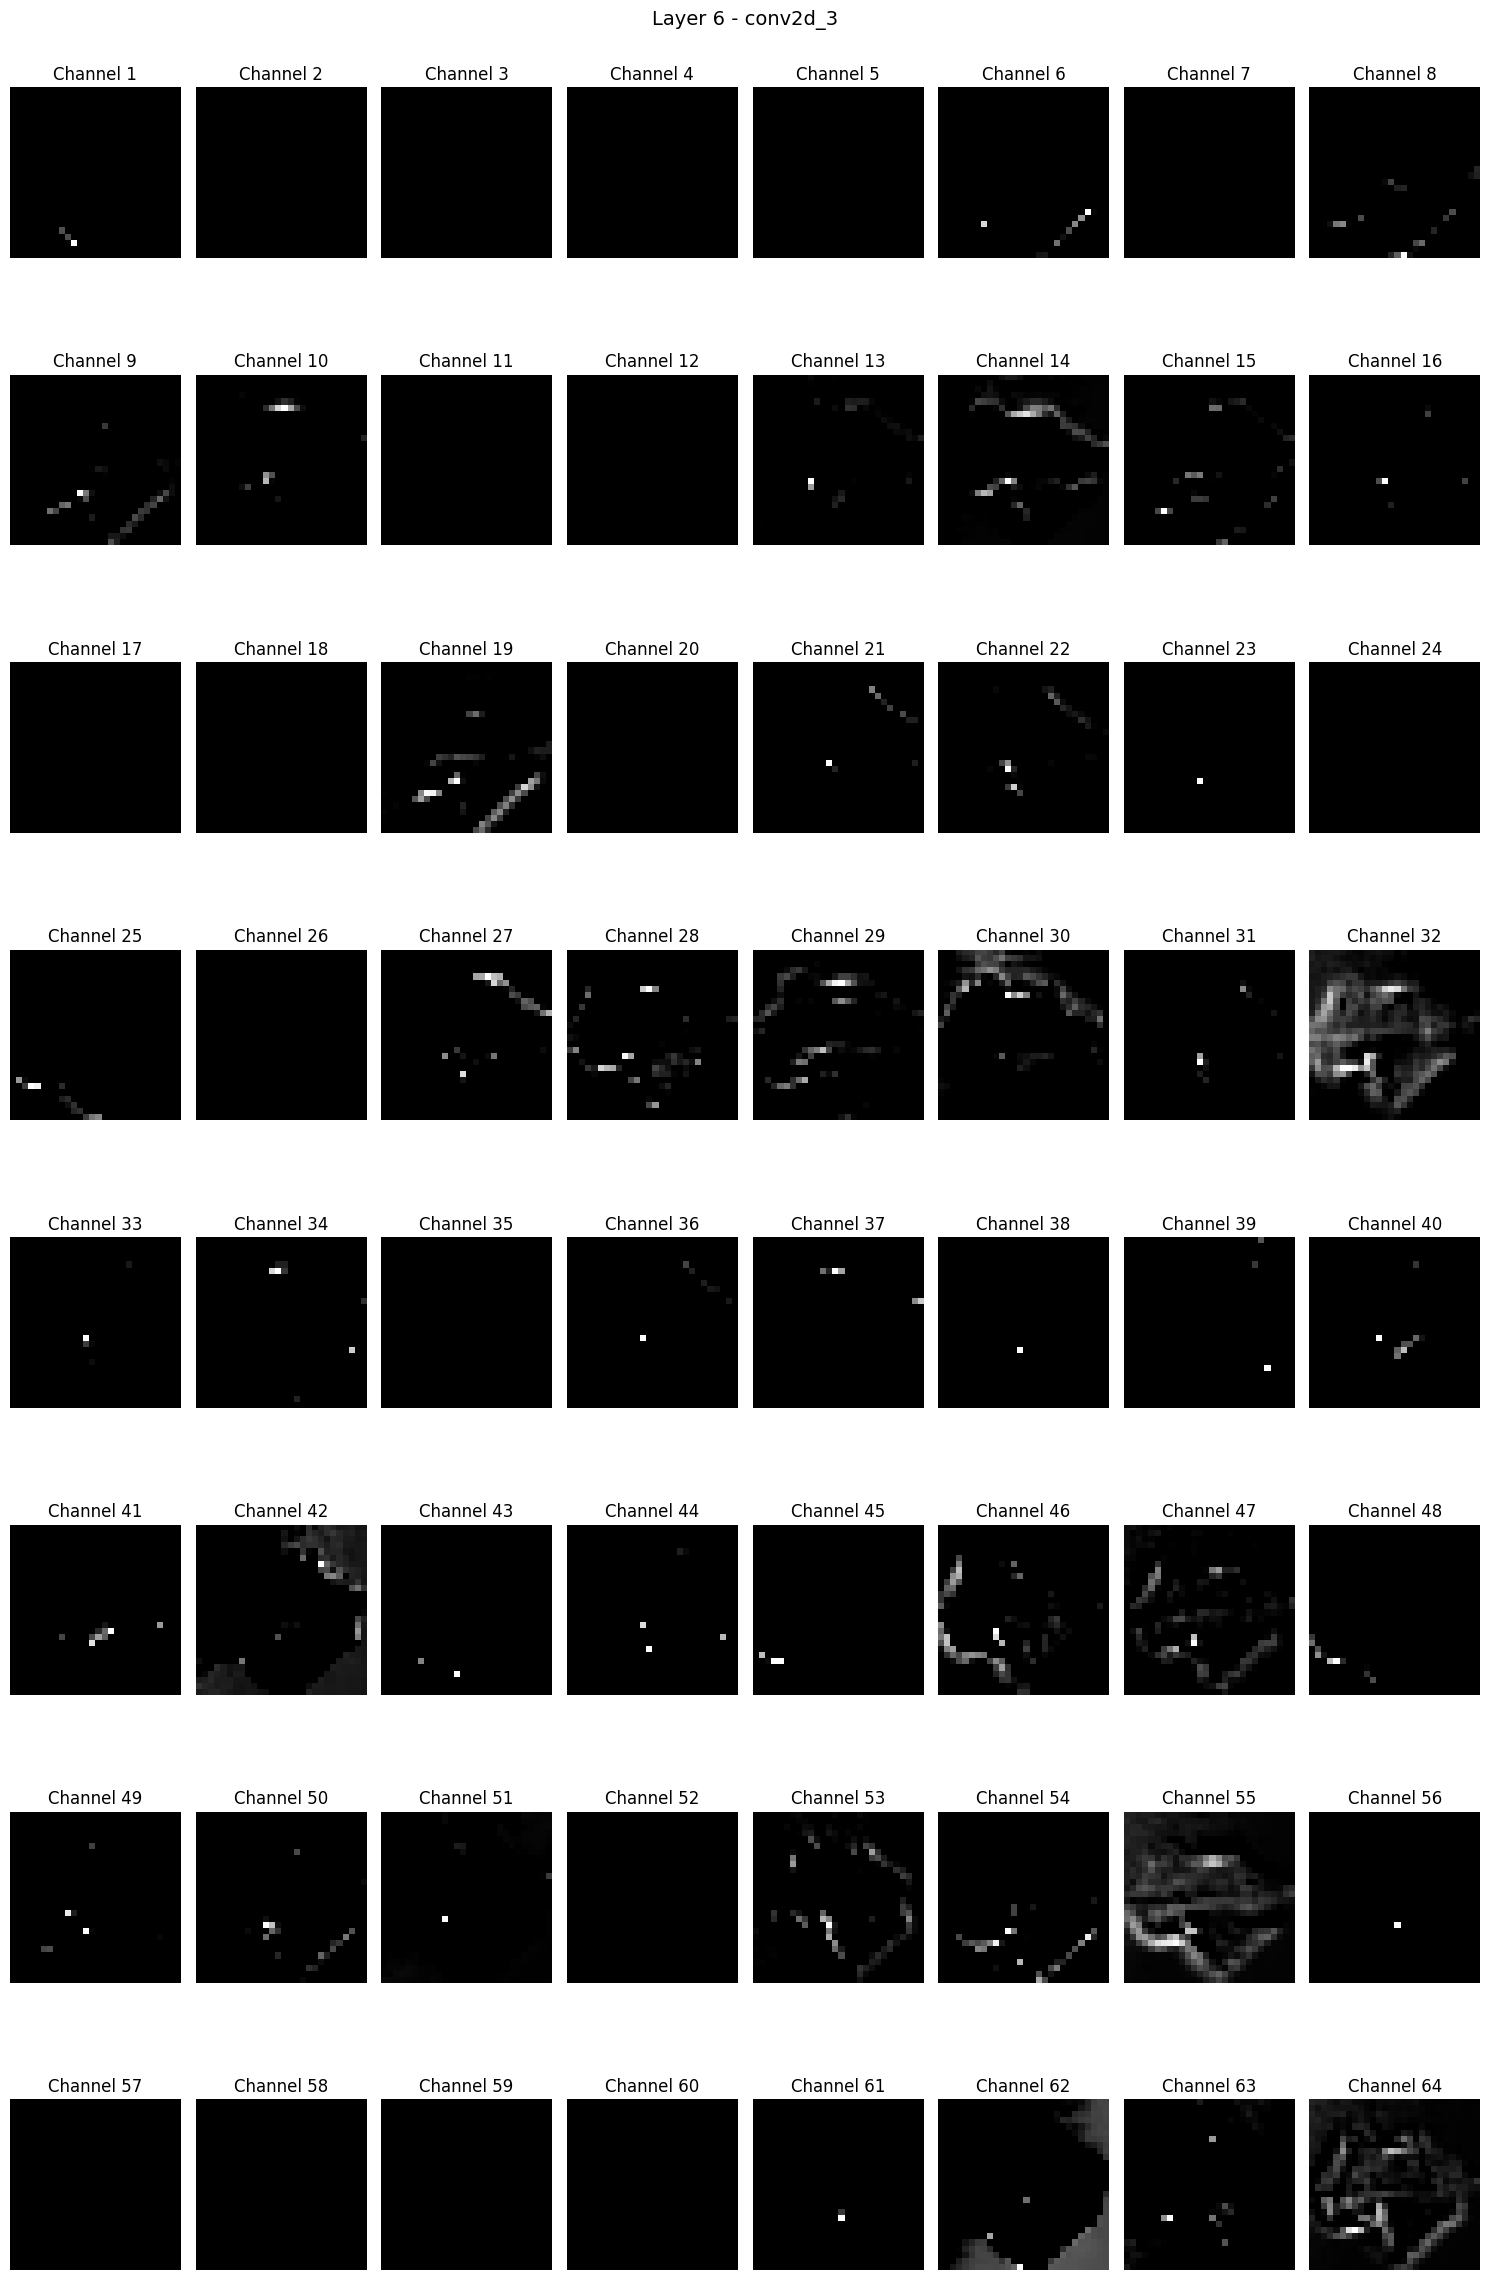

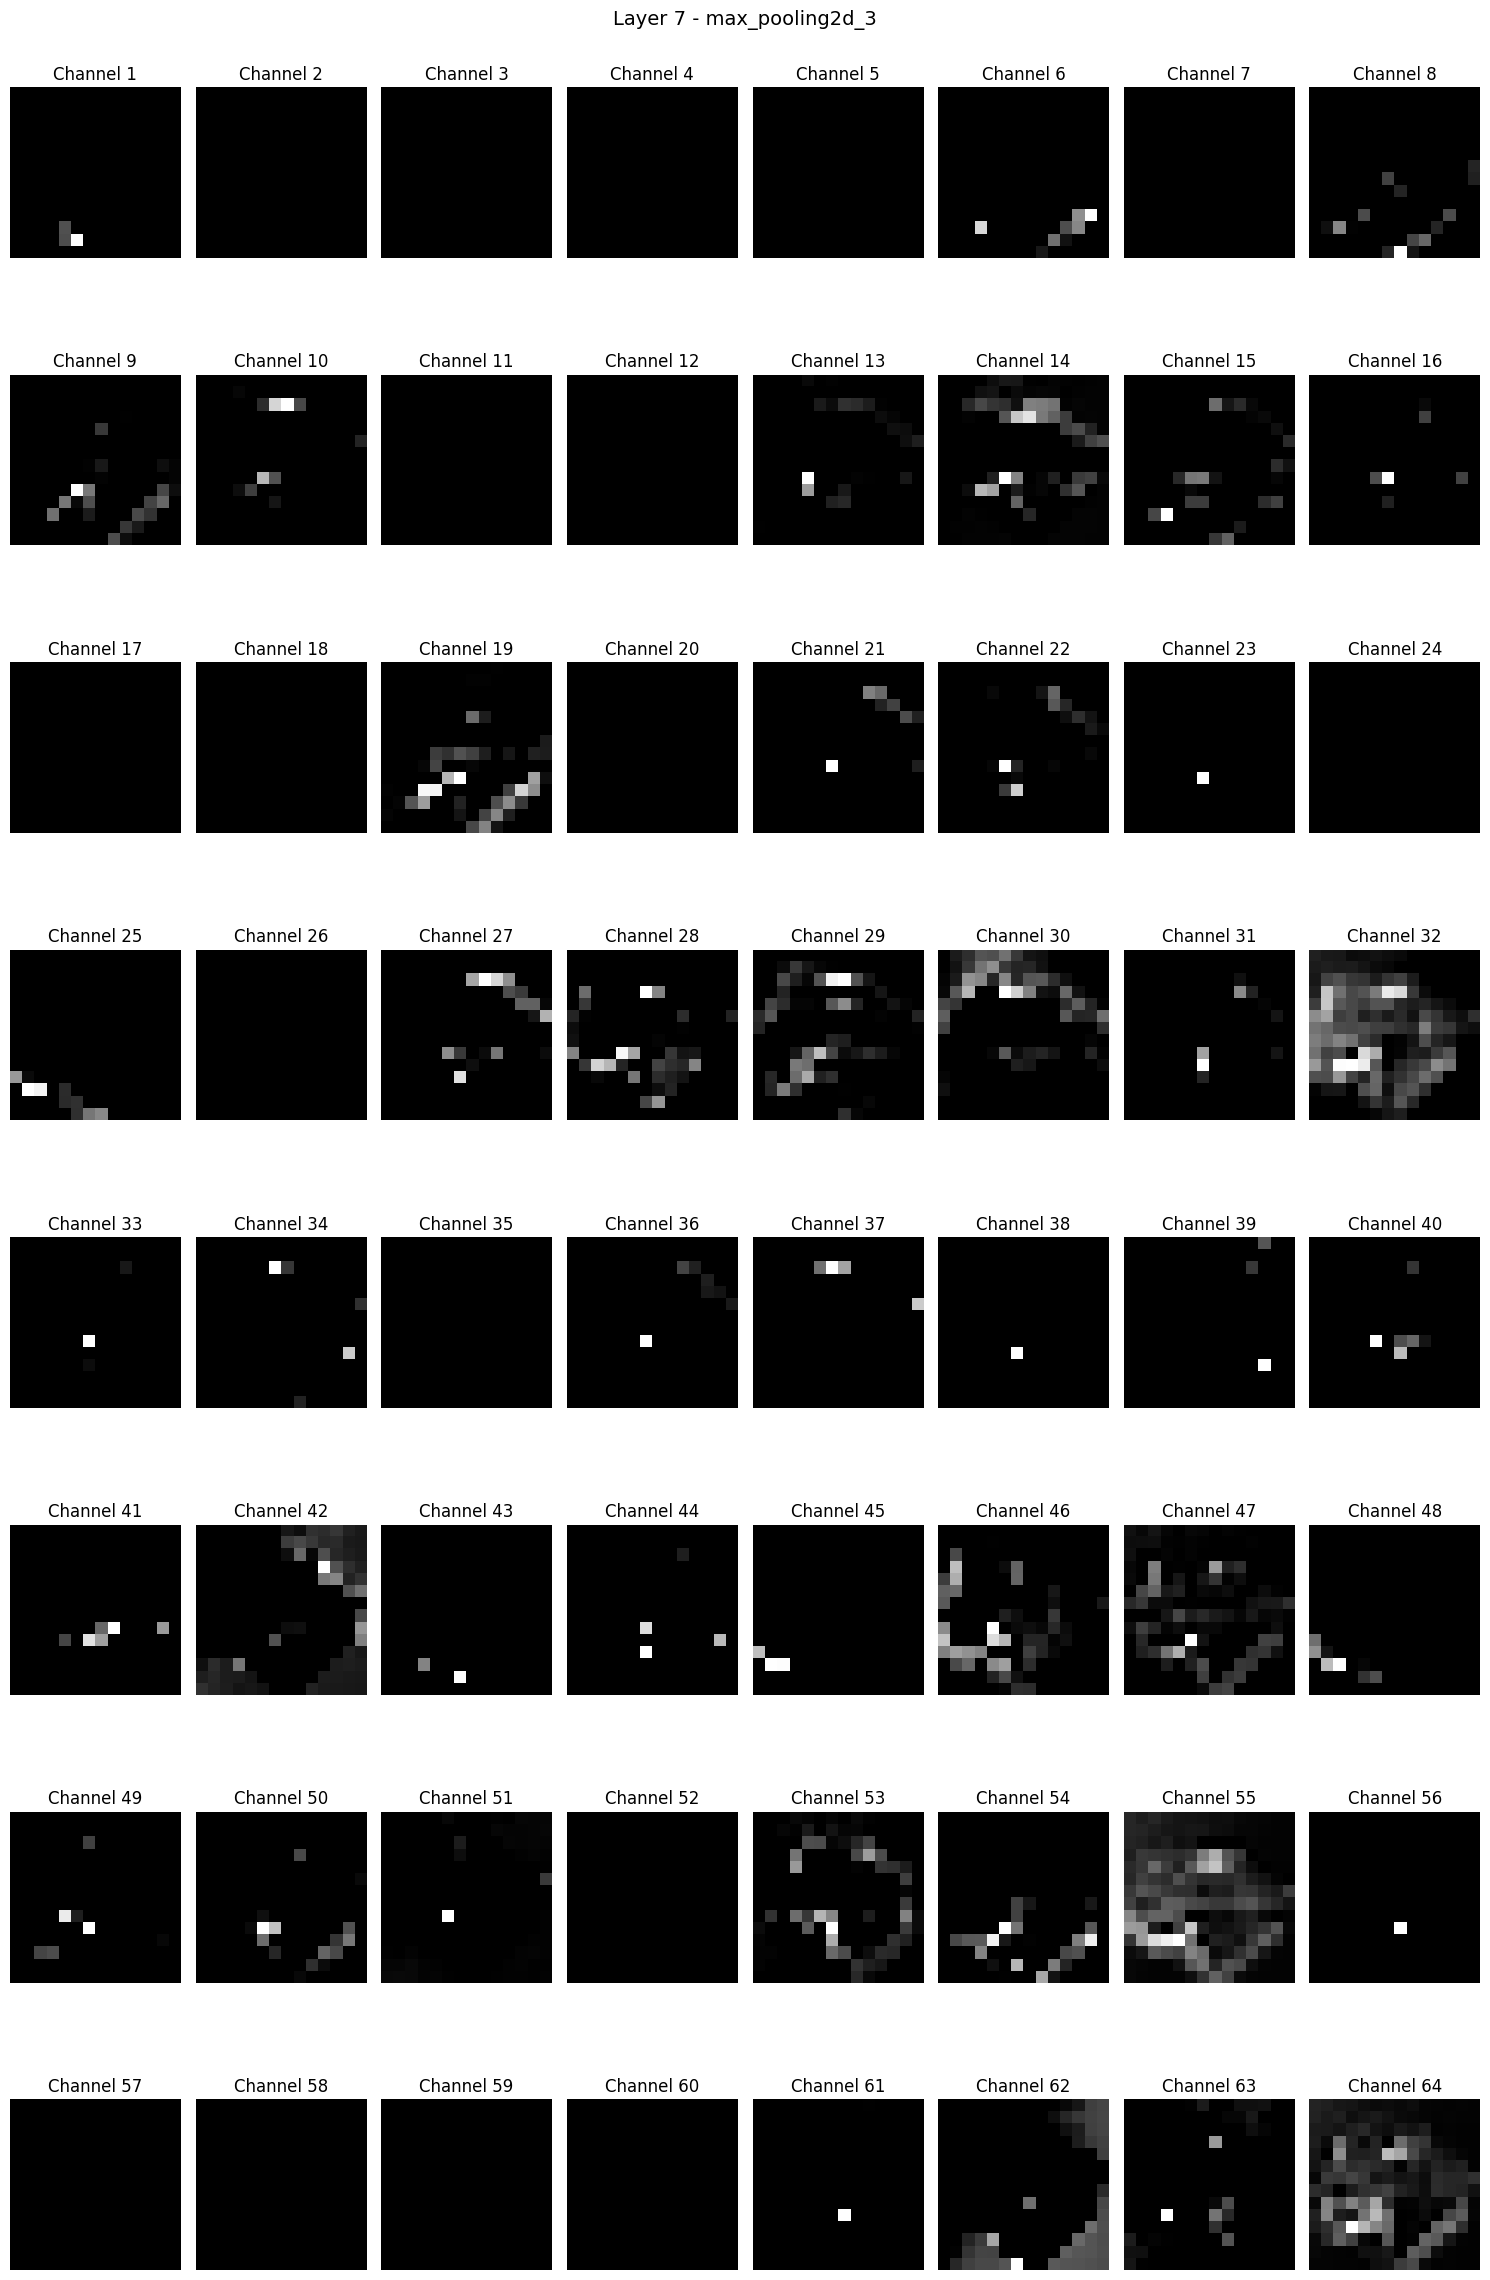

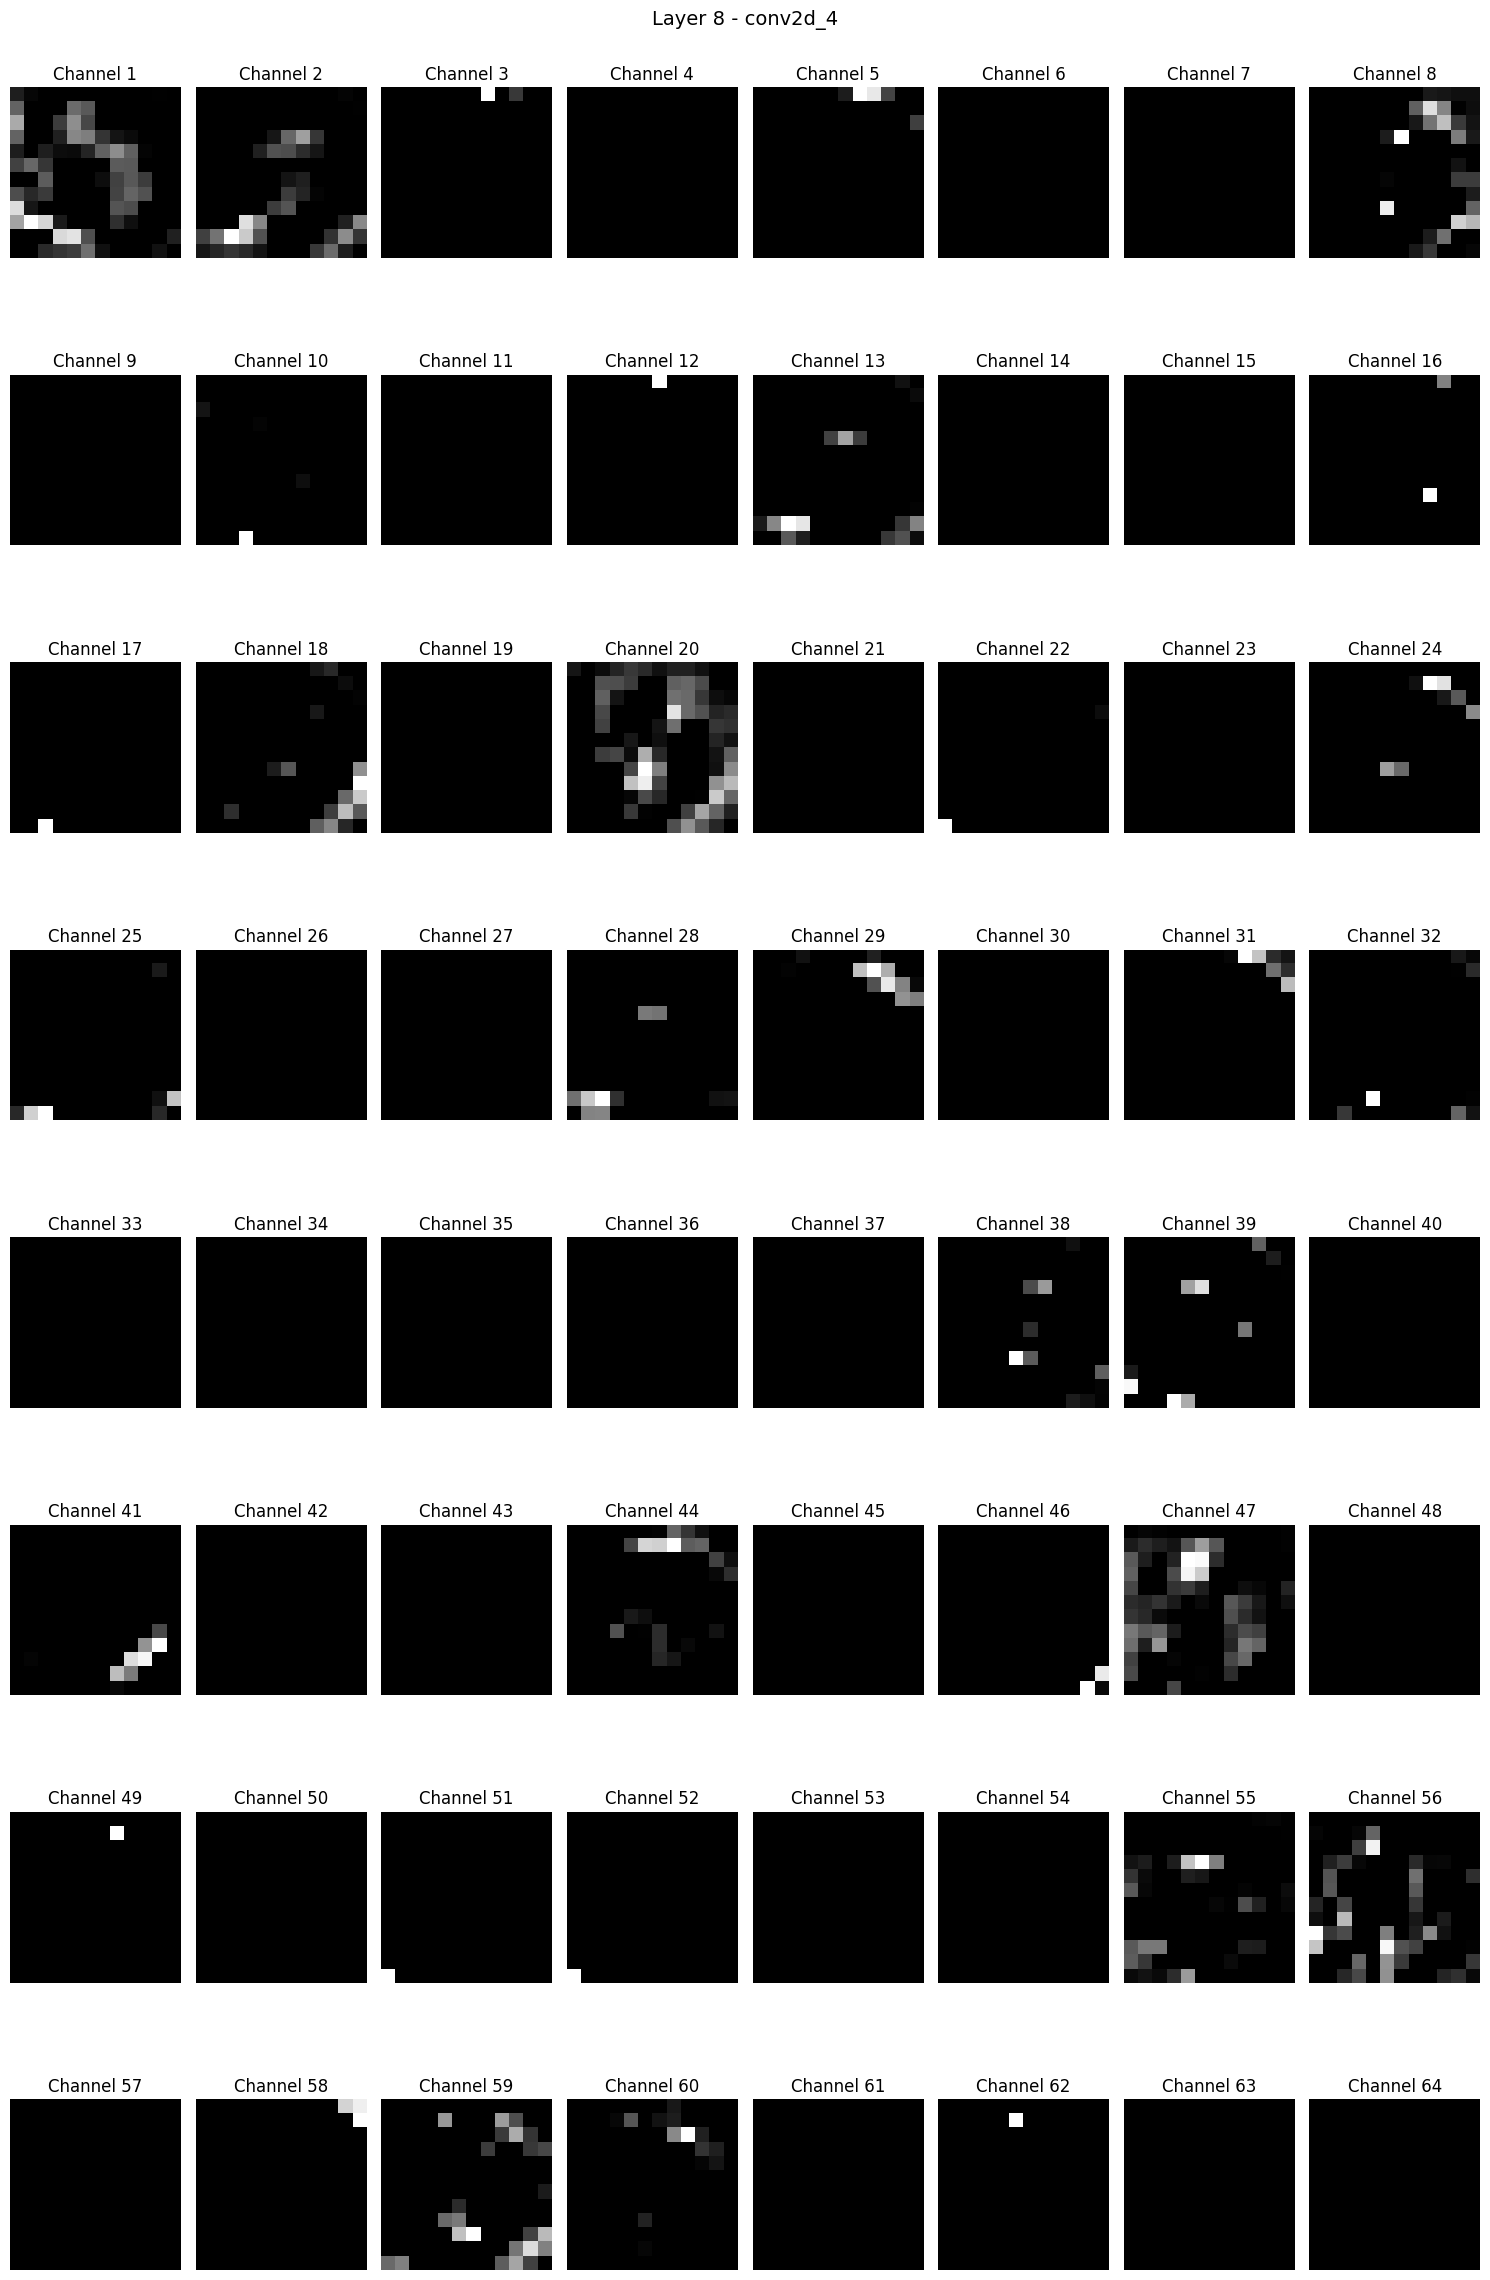

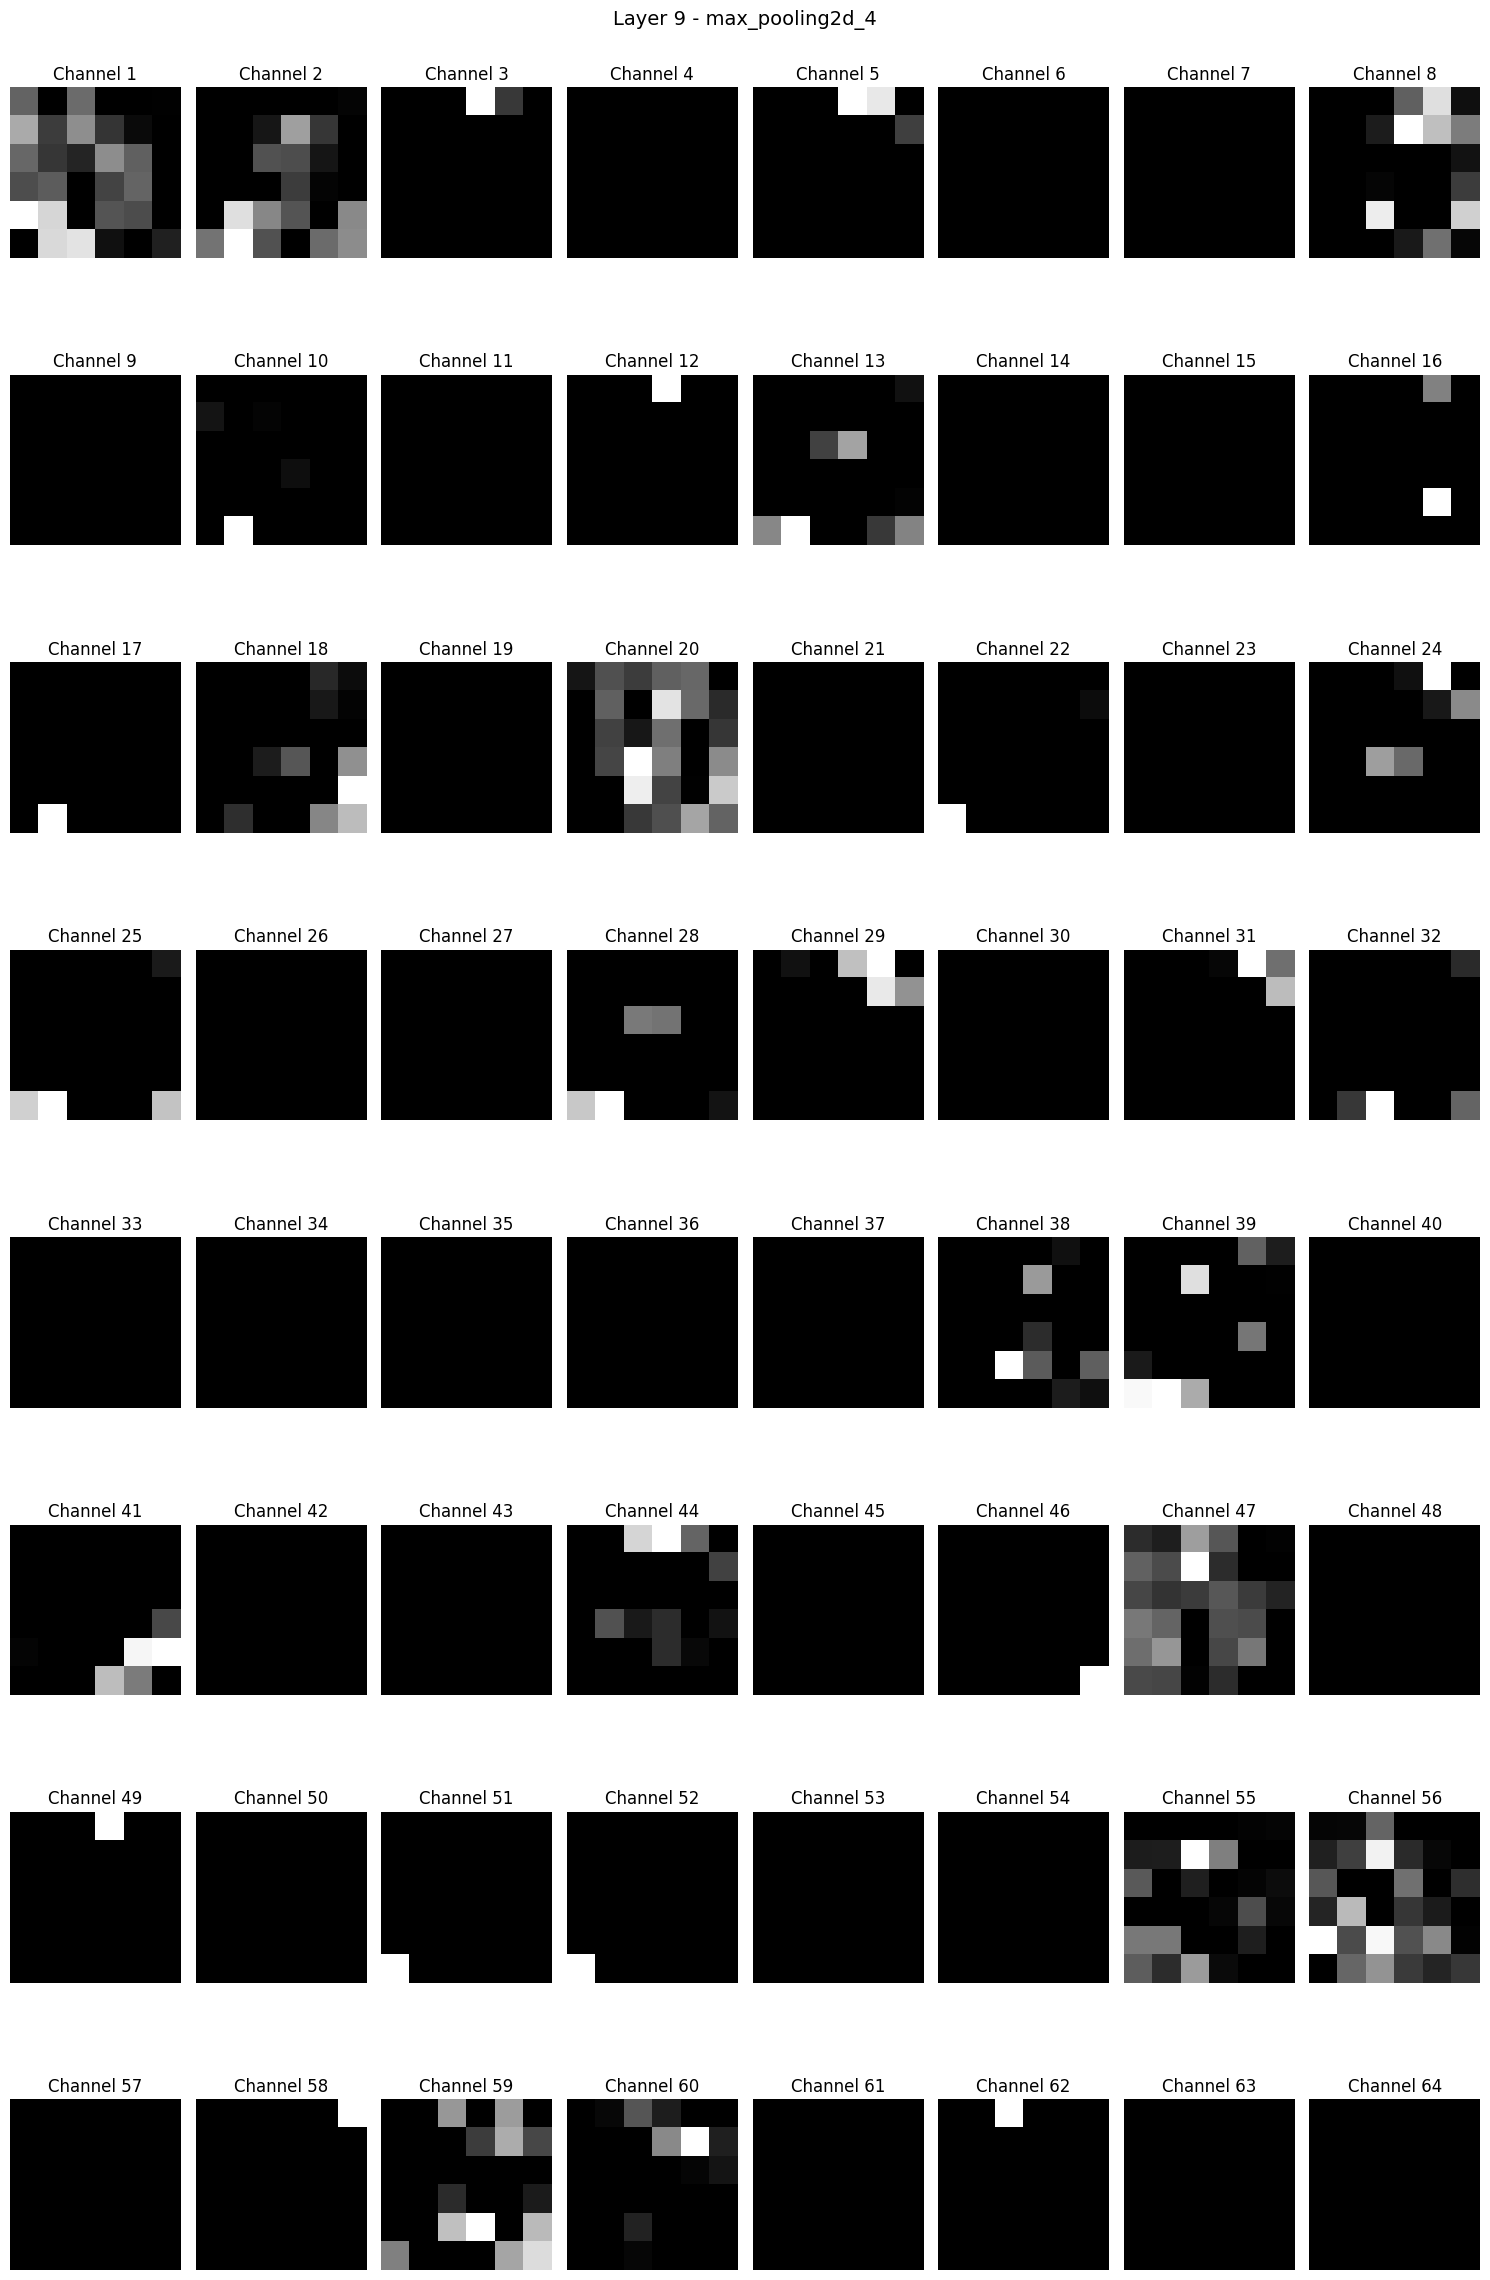

ValueError: Image size of 1500x86400 pixels is too large. It must be less than 2^16 in each direction.

Error in callback <function _draw_all_if_interactive at 0x7f0ce4d9c220> (for post_execute):


ValueError: Image size of 1500x86400 pixels is too large. It must be less than 2^16 in each direction.

ValueError: Image size of 1500x86400 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1500x86400 with 2304 Axes>

In [2]:
from PIL import Image
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = Image.open('./train/Cedarapplerust/CedarAppleRust(1000).JPG')

# Resize the image while preserving the aspect ratio
max_dimension = 300  # Adjust this value as needed
image.thumbnail((max_dimension, max_dimension))

# Load your Sequential model from a file
model_path = './Apple_Disease_Detection.h5'
model = tf.keras.models.load_model(model_path)

# Create a new model with the same inputs as the loaded model
layer_outputs = [layer.output for layer in model.layers]
intermediate_model = tf.keras.Model(inputs=model.input, outputs=layer_outputs)

# Convert the image to an array and preprocess it
image_array = tf.keras.preprocessing.image.img_to_array(image)
image_array = tf.keras.applications.vgg16.preprocess_input(image_array)
image_array = tf.expand_dims(image_array, axis=0)

# Pass the image through the intermediate model to get the layer activations
activations = intermediate_model.predict(image_array)

# Iterate over each layer's activation and visualize all channels
for layer_index, layer_activation in enumerate(activations):
    # Determine the number of channels in the layer's activation
    channels = layer_activation.shape[-1]

    # Determine the number of rows and columns for subplots
    cols = min(channels, 8)  # Maximum 8 columns for better visibility
    rows = (channels - 1) // cols + 1

    # Create the figure and axes for subplots
    fig, ax = plt.subplots(rows, cols, figsize=(15, rows * 3))
    fig.suptitle(f'Layer {layer_index} - {model.layers[layer_index].name}', fontsize=14)

    # Iterate over channels and plot the activations
    for i in range(channels):
        # Get the activations of the current channel
        channel_activations = layer_activation[..., i]

        # Normalize activations to the range [0, 255]
        normalized_activations = ((channel_activations - np.min(channel_activations)) /
                                  (np.max(channel_activations) - np.min(channel_activations))) * 255

        # Convert to unsigned 8-bit integers
        normalized_activations = normalized_activations.astype(np.uint8)

        # Check the shape of normalized_activations
        if len(normalized_activations.shape) < 3:
            normalized_activations = np.expand_dims(normalized_activations, axis=-1)

        # Create a gray-scale image from the normalized activations
        gray_image = Image.fromarray(normalized_activations[0], mode='L')

        # Display the gray-scale image
        if rows == 1:
            ax[i % cols].imshow(gray_image, cmap='gray')
            ax[i % cols].axis('off')
            ax[i % cols].set_title(f'Channel {i+1}')
        else:
            ax[i // cols, i % cols].imshow(gray_image, cmap='gray')
            ax[i // cols, i % cols].axis('off')
            ax[i // cols, i % cols].set_title(f'Channel {i+1}')

    # Adjust layout and display the figure
    plt.tight_layout()
    plt.show()
